<a href="https://colab.research.google.com/github/Whaleman0423/class_no.4_paper/blob/main/transfer_scooter2_20211028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!git clone https://github.com/DeepVoltaire/AutoAugment.git

Cloning into 'AutoAugment'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 153 (delta 6), reused 13 (delta 6), pack-reused 136
Receiving objects: 100% (153/153), 35.60 MiB | 14.57 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [20]:
from autoaugment import CIFAR10Policy, SubPolicy

In [21]:
import glob
import os
os.chdir("/content/drive/MyDrive/Tebame_第四組_機車辨識")

## 讀取 google drive圖檔 :

In [22]:
# 600以上 : S2、GP、KRV、FIDDLE、SR、活力、新名流、DRG、新迪爵、LIMI、六代勁戰
s2 = glob.glob("./原始照片(含外拍及網路)/GOGORO_S2/*") + glob.glob("./裁剪照片(不含不用裁的)/GOGORO_S2_裁/*") 

gp = glob.glob("./原始照片(含外拍及網路)/KYMCO_GP/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_GP_125_裁/*") 

krv = glob.glob("./原始照片(含外拍及網路)/KYMCO_KRV/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_KRV_裁/*")

fiddle = glob.glob("./原始照片(含外拍及網路)/SYM_FIDDLE/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_FIDDLE_125_裁/*") 

sr = glob.glob("./原始照片(含外拍及網路)/SYM_JET_SR/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_JET_SR_125_裁/*")

vivo = glob.glob("./原始照片(含外拍及網路)/SYM_活力/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_活力_125_裁/*")

famous = glob.glob("./原始照片(含外拍及網路)/KYMCO_新名流/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_新名流125_裁/*")

drg = glob.glob("./原始照片(含外拍及網路)/SYM_DRG/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_DRG_裁/*") 

duke = glob.glob("./原始照片(含外拍及網路)/SYM_新迪爵/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_新迪爵_125 _裁/*")

limi = glob.glob("./原始照片(含外拍及網路)/YAMAHA_LIMI/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_LIMI_125_已裁減/*")

gryphus6 = glob.glob("./原始照片(含外拍及網路)/YAMAHA_六代勁戰/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/*")







In [23]:
import pandas as pd
df = pd.DataFrame({
    "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6,
    "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6)
})
df

,path,ans
0,./原始照片(含外拍及網路)/GOGORO_S2/180831qbt797we2t_medi...,0
1,./原始照片(含外拍及網路)/GOGORO_S2/gogoro-s2-實車照.001.jpeg,0
2,./原始照片(含外拍及網路)/GOGORO_S2/864ea641ae77f460bf174...,0
3,./原始照片(含外拍及網路)/GOGORO_S2/02_s2_abs_indigo_05_f...,0
4,./原始照片(含外拍及網路)/GOGORO_S2/864ea641ae77f460bf174...,0
...,...,...
10145,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242123753...,10
10146,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242132239...,10
10147,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242140840...,10
10148,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242150895...,10


#### 偷別人卷積網路 :
###### google keras application

In [24]:
from tensorflow.keras.applications.vgg16 import VGG16  # 偷別人眼睛
cnn = VGG16(include_top=False, input_shape=(224, 224, 3))
cnn.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

##### 高參數 =>訓練資料要多
##### 低參數 =>訓練資料要少

#####開始疊層數

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization
cnn.layers

In [26]:
for l in cnn.layers:
  l.trainable = False  # cnn 已經是訓練好的了，所以先凍住cnn的參數 ，只訓練後面的mlp的參數 # 要在 compile 前設

layers = [
          BatchNormalization(),
          GlobalAveragePooling2D(),
          Dense(11, activation="softmax")
]
model = Sequential(cnn.layers + layers) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

##### 模型 compile

In [27]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(
        loss=SparseCategoricalCrossentropy(),
        optimizer="adam",
        metrics=["acc"]
)

###### 先看一下圖片

[[[ 57.060997   42.221      27.32     ]
  [ 57.060997   42.221      27.32     ]
  [ 57.060997   42.221      26.32     ]
  ...
  [-66.939     -77.779     -18.68     ]
  [-62.939003  -77.779     -20.68     ]
  [-60.939003  -77.779     -19.68     ]]

 [[ 57.060997   41.221      27.32     ]
  [ 58.060997   41.221      28.32     ]
  [ 57.060997   41.221      28.32     ]
  ...
  [-64.939     -78.779     -18.68     ]
  [-65.939     -79.779     -23.68     ]
  [-62.939003  -78.779     -22.68     ]]

 [[ 60.060997   44.221      31.32     ]
  [ 61.060997   44.221      31.32     ]
  [ 60.060997   43.221      30.32     ]
  ...
  [-63.939003  -79.779     -17.68     ]
  [-63.939003  -78.779     -20.68     ]
  [-61.939003  -76.779     -20.68     ]]

 ...

 [[ 11.060997    3.2210007   5.3199997]
  [ 15.060997    7.2210007   9.32     ]
  [ 15.060997    7.2210007   9.32     ]
  ...
  [-55.939003  -62.779     -56.68     ]
  [-54.939003  -61.779     -55.68     ]
  [-54.939003  -61.779     -55.68     ]]

 [

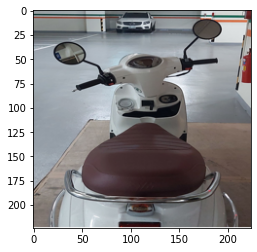

In [28]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# import 匯入 當初預處理的方式
from tensorflow.keras.applications.vgg16 import preprocess_input 
p = df["path"]
idx = random.randint(0, len(p)-1)
img = Image.open(p[idx]).resize((224, 224)).convert("RGB")
img_np = np.array(img)
# VGG16 的資料是怎麼預處理的 ? google preprocess_input github
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py
img_np_pre = preprocess_input(img_np)
print(img_np_pre)
plt.imshow(img)

### generator

In [29]:
x = np.array(df["path"])
y = np.array(df["ans"])

In [30]:
def data_generator(x, y, batch_size=21):
  while True:
    idx = np.random.randint(0, len(x), size=batch_size)
    x_batch, y_batch = x[idx], y[idx]
    x_final = []
    for path in x_batch:
      img = Image.open(path).resize((224, 224)).convert("RGB")    #  開啟路徑圖檔並改大小、轉成RGB
      policy = CIFAR10Policy()
      img = policy(img)

      img_pre = preprocess_input(np.array(img))              # 轉成陣列再預處理
      x_final.append(img_pre)            
    x_final = np.array(x_final)
    y_batch = np.array(y_batch)
    yield (x_final, y_batch)
gen = data_generator(x, y)
x_gen, y_gen = gen.__next__()
print(x_gen.shape)
print(y_gen.shape)
print(x_gen)
print(y_gen)


(21, 224, 224, 3)
(21,)
[[[[-5.5939003e+01 -6.8778999e+01 -8.7680000e+01]
   [-5.8939003e+01 -7.1778999e+01 -9.0680000e+01]
   [-5.8939003e+01 -7.1778999e+01 -9.0680000e+01]
   ...
   [-2.9939003e+01 -4.1778999e+01 -4.7680000e+01]
   [-8.9390030e+00  7.2210007e+00 -3.6800003e+00]
   [-7.9390030e+00  1.4221001e+01  4.3199997e+00]]

  [[-5.6939003e+01 -6.9778999e+01 -8.8680000e+01]
   [-5.8939003e+01 -7.1778999e+01 -9.0680000e+01]
   [-6.0939003e+01 -7.3778999e+01 -9.2680000e+01]
   ...
   [-3.6939003e+01 -5.2778999e+01 -5.6680000e+01]
   [-1.3939003e+01 -5.7789993e+00 -1.3680000e+01]
   [ 6.1060997e+01  7.1221001e+01  6.2320000e+01]]

  [[-5.7939003e+01 -7.0778999e+01 -8.9680000e+01]
   [-6.0939003e+01 -7.3778999e+01 -9.2680000e+01]
   [-6.1939003e+01 -7.4778999e+01 -9.3680000e+01]
   ...
   [-4.1939003e+01 -5.9778999e+01 -6.1680000e+01]
   [ 2.1060997e+01  1.4221001e+01  1.0320000e+01]
   [ 1.4606100e+02  1.3522101e+02  1.3132001e+02]]

  ...

  [[ 5.6060997e+01  4.7221001e+01  4.73200

In [31]:
def test_generator(x, y, batch_size=21):
  while True:
    idx = np.random.randint(0, len(x), size=batch_size)
    x_batch, y_batch = x[idx], y[idx]
    x_final = []
    for path in x_batch:
      img = Image.open(path).resize((224, 224)).convert("RGB")    #  開啟路徑圖檔並改大小、轉成RGB
      img_pre = preprocess_input(np.array(img))              # 轉成陣列再預處理
      x_final.append(img_pre)            
    x_final = np.array(x_final)
    y_batch = np.array(y_batch)
    yield (x_final, y_batch)
gen = data_generator(x, y)
x_gen, y_gen = gen.__next__()
print(x_gen.shape)
print(y_gen.shape)
print(x_gen)
print(y_gen)


(21, 224, 224, 3)
(21,)
[[[[-6.9390030e+00 -1.5778999e+01 -1.8680000e+01]
   [-5.1939003e+01 -6.0778999e+01 -5.7680000e+01]
   [-4.6939003e+01 -5.6778999e+01 -5.7680000e+01]
   ...
   [-5.9390030e+00  7.2210007e+00  3.8320000e+01]
   [ 1.3060997e+01  1.2221001e+01  3.4320000e+01]
   [ 7.0609970e+00  2.2100067e-01  1.1320000e+01]]

  [[ 2.9060997e+01  3.6221001e+01  5.1320000e+01]
   [ 5.6060997e+01  6.5221001e+01  8.1320000e+01]
   [ 3.0609970e+00  4.2210007e+00  1.2320000e+01]
   ...
   [ 3.9060997e+01  4.6221001e+01  6.7320000e+01]
   [ 4.2060997e+01  3.8221001e+01  5.0320000e+01]
   [-2.6939003e+01 -3.3778999e+01 -2.7680000e+01]]

  [[ 7.5060997e+01  8.0221001e+01  9.1320000e+01]
   [ 7.4060997e+01  7.9221001e+01  8.9320000e+01]
   [ 2.5060997e+01  2.7221001e+01  3.9320000e+01]
   ...
   [ 7.1060997e+01  5.5221001e+01  4.6320000e+01]
   [ 6.2060997e+01  4.8221001e+01  4.1320000e+01]
   [ 6.6060997e+01  6.2221001e+01  6.6320000e+01]]

  ...

  [[ 9.0060997e+01  7.9221001e+01  8.23200

In [32]:
s2_x = x[y == 0]
gp_x = x[y == 1]
krv_x = x[y == 2]
fiddle_x = x[y == 3]
sr_x = x[y == 4]
vivo_x = x[y == 5]
famous_x = x[y == 6]
drg_x = x[y == 7]
duke_x = x[y == 8]
limi_x = x[y == 9]
gryphus6_x = x[y == 10]

print("s2 共:", len(s2_x))
print("gp 共:", len(gp_x))
print("krv 共:", len(krv_x))
print("fiddle 共:", len(fiddle_x))
print("sr 共:", len(sr_x))
print("vivo 共:", len(vivo_x))
print("famous 共:", len(famous_x))
print("drg 共:", len(drg_x))
print("duke 共:", len(duke_x))
print("limi 共:", len(limi_x))
print("gryphus6 共:", len(gryphus6_x))


s2 共: 863
gp 共: 829
krv 共: 816
fiddle 共: 1317
sr 共: 655
vivo 共: 803
famous 共: 827
drg 共: 875
duke 共: 1129
limi 共: 786
gryphus6 共: 1250


In [33]:
from sklearn.model_selection import train_test_split
import numpy as np

 # "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6,
    # "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    # + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6)
scooters = [s2_x, gp_x, krv_x, fiddle_x, sr_x, vivo_x, famous_x, drg_x, duke_x, limi_x, gryphus6_x]
scts_nums = []

for i in scooters:
  a = np.random.choice(i, 630, replace=False)
  b, c = train_test_split(a, test_size=0.1)
  num = (a, b, c)
  scts_nums.append(num)
# print(len(scts_nums[:][]))
# S2_380 = np.random.choice(S2_x, 380, replace=False)
# S2_342, S2_38 = train_test_split(S2_380, test_size=0.1)


x_train = np.concatenate([x[1] for x in scts_nums])
y_train = np.array([0] * 567 + [1]*567+[2]*567+[3]*567+[4]*567+[5]*567+[6]*567+[7]*567+[8]*567+[9]*567+[10]*567)

x_test = np.concatenate([x[2] for x in scts_nums])
y_test = np.array([0] * 63 + [1]*63+[2]*63+[3]*63+[4]*63+[5]*63+[6]*63+[7]*63+[8]*63+[9]*63+[10]*63)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6237,)
(693,)
(6237,)
(693,)


In [34]:
train_generator = data_generator(x_train, y_train)
test_generator = test_generator(x_test, y_test)

In [ ]:
# 20 * 19 => 380訓練
# 5 * 19 => 38測試
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
             EarlyStopping(patience=5, restore_best_weights=True),
             ModelCheckpoint("/content/drive/MyDrive/Tebame_第四組_機車辨識/機車辨識模型檔/VGG16_10款_1031_宇.h5", save_best_only=True)
]

model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=100,
    validation_data=test_generator,
    validation_steps=3, 
    callbacks=callbacks
                    )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
30/30 [==============================] - 269s 8s/step - loss: 2.3779 - acc: 0.1349 - val_loss: 2.2487 - val_acc: 0.2540
Epoch 2/100
30/30 [==============================] - 217s 7s/step - loss: 2.1814 - acc: 0.2857 - val_loss: 2.1405 - val_acc: 0.2698
Epoch 3/100
30/30 [==============================] - 199s 7s/step - loss: 2.0540 - acc: 0.3587 - val_loss: 1.9017 - val_acc: 0.4127
Epoch 4/100
30/30 [==============================] - 193s 7s/step - loss: 1.9544 - acc: 0.4206 - val_loss: 1.6215 - val_acc: 0.5397
Epoch 5/100
30/30 [==============================] - 179s 6s/step - loss: 1.8591 - acc: 0.4413 - val_loss: 1.7489 - val_acc: 0.5238
Epoch 6/100
30/30 [==============================] - 157s 5s/step - loss: 1.7803 - acc: 0.4810 - val_loss: 1.4953 - val_acc: 0.6190
Epoch 7/100
30/30 [==============================] - 144s 5s/step - loss: 1.6670 - acc: 0.5429 - val_loss: 1.7718 - val_acc: 0.5079
Epoch 8/100
30/30 [==============================] - 157s 5s/step - loss: 1.

In [ ]:
ori_imgs = []
for p in x_test:
    img = Image.open(p).resize((224, 224)).convert("RGB")
    ori_imgs.append(np.array(img))
ori_imgs = np.array(ori_imgs)
preprocess_imgs = preprocess_input(ori_imgs)

pre = model.predict(preprocess_imgs)



In [ ]:
pre = pre.argmax(axis=1)

In [ ]:
trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6"]
# s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6,
idx = np.nonzero(pre != y_test)[0]
pre_false_img = ori_imgs[idx]
pre_false_val = pre[idx]
pre_false_ori = y_test[idx]

plt.figure(figsize=(15, 15))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_ori[i]],
                                trans[pre_false_val[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(
        mat,
        index=["{}(正確)".format(trans[i]) for i in range(11)],
        columns=["{}(預測)".format(trans[i]) for i in range(11)]
)

In [ ]:
# import requests
# url = input("Enter:")
# response = requests.get(url, stream=True, verify=False)
# img = Image.open(response.raw).resize((224, 224)).convert("RGB")
# img_np = preprocess_input(np.array(img).reshape(1, 224, 224, 3))
# proba = model.predict(img_np)
# ans = proba.argmax(axis=1)
# print("預測:", trans[ans[0]])
# print("機率:", proba[0])
# plt.imshow(img)
# #trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6"]

In [ ]:
# from tensorflow.keras.models import load_model
# from PIL import Image
# from tensorflow.keras.applications.vgg16 import preprocess_input 
# trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6"]

# model = load_model("/content/drive/MyDrive/Tebame_第四組_機車辨識/機車辨識模型檔/VGG16_10款_1028_宇.h5")
# img = Image.open("/content/DRG.jpg").resize((224, 224)).convert("RGB")
# img_np = preprocess_input(np.array(img).reshape(1, 224, 224, 3))
# proba = model.predict(img_np)
# ans = proba.argmax(axis=1)
# print("預測:", trans[ans[0]])